In [19]:
import re
import pandas as pd
import numpy as np
from datetime import datetime
from core.Enums import MissValueStrategy
from processor.PreProcessor import PreProcessor
!pip install mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [20]:
print("Reading Document ...")
dataArr = pd.read_csv("../files/raw/online store customer.csv")
## Level 1 of Project
processor = PreProcessor(dataArr)
processor.changeColumnNames([("Gender", "Sex")])
processor.changeDataTypes([("Transaction_date", "datetime64[ns]")])
bins = [0, 1000, 1500, float('inf')]
labels = ['Small', 'Medium', 'Large']
dataArr["Amount_spent_category"] = pd.cut(dataArr["Amount_spent"],bins=bins,labels=labels)
#processor.categorizeNumbericValueOf("Amount_spent","Amount_spent_category",bins,labels)
processor.fillMissValues(
    [("Sex", MissValueStrategy.MODE), ("Amount_spent", MissValueStrategy.MEAN),
     ("Employees_status", MissValueStrategy.MODE), ("Age", MissValueStrategy.MEDIAN)])
result = dataArr[['Employees_status', 'Amount_spent']].groupby(['Employees_status']).agg(
    ['mean'])
print(result)


Reading Document ...
                 Amount_spent
                         mean
Employees_status             
Employees         1433.319266
Unemployment      1360.936618
self-employed     1456.565709
workers           1395.369485


In [21]:
## Data Cleaning Visualization

<Axes: xlabel='year'>

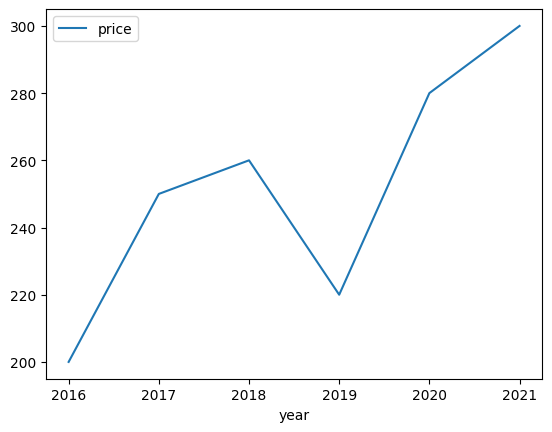

In [22]:
dict_line = {
    'year': [2016, 2017, 2018, 2019, 2020, 2021],
    'price': [200, 250, 260, 220, 280, 300]
}
df_line = pd.DataFrame(dict_line)
df_line.plot('year', 'price')

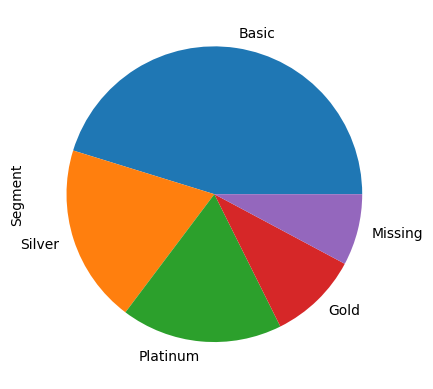

In [27]:
dataArr.Segment.value_counts().plot(
    kind='pie');

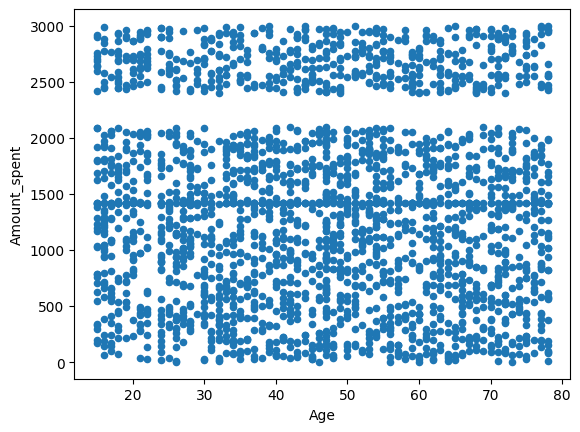

In [32]:
dataArr.plot(
    x='Age',
    y='Amount_spent',
    kind='scatter'
);

In [24]:
selected_columns = ['Sex', 'Amount_spent_category','Marital_status','State_names','Payment_method']
columnsRul = dataArr[selected_columns]

one_hot_encoded = pd.get_dummies(columnsRul)
frequent_itemsets = apriori(one_hot_encoded, min_support=0.2, use_colnames=True)
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# Print the frequent item sets
print("Frequent Item Sets:")
print(frequent_itemsets)

# Print the association rules
print("\nAssociation Rules:")
print(association_rules_df)


Frequent Item Sets:
     support                                           itemsets
0   0.550955                                       (Sex_Female)
1   0.449045                                         (Sex_Male)
2   0.336783                      (Amount_spent_category_Small)
3   0.401672                      (Amount_spent_category_Large)
4   0.586385                           (Marital_status_Married)
5   0.413615                            (Marital_status_Single)
6   0.298169                              (Payment_method_Card)
7   0.236863                             (Payment_method_Other)
8   0.464968                            (Payment_method_PayPal)
9   0.219745          (Amount_spent_category_Large, Sex_Female)
10  0.320462               (Marital_status_Married, Sex_Female)
11  0.230494                (Marital_status_Single, Sex_Female)
12  0.249204                (Payment_method_PayPal, Sex_Female)
13  0.265924                 (Sex_Male, Marital_status_Married)
14  0.215764        

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


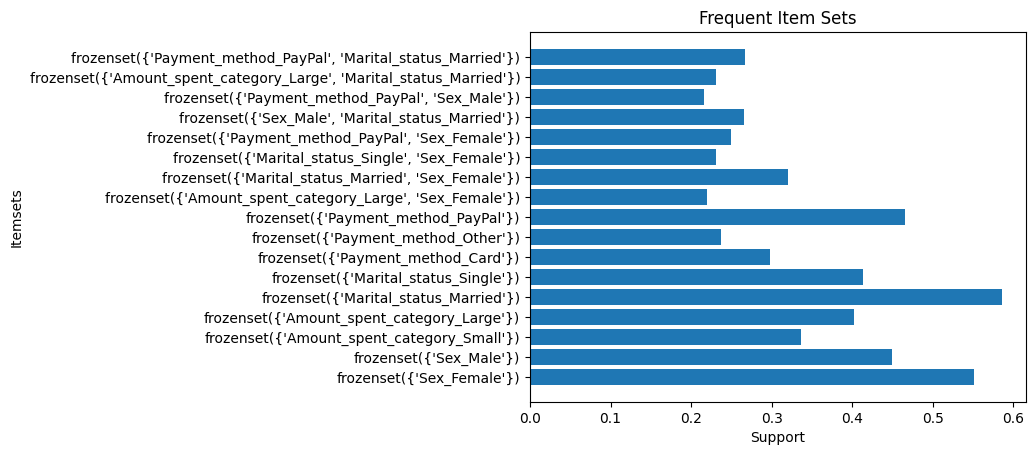

In [25]:
# Visualize frequent item sets
plt.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], tick_label=frequent_itemsets['itemsets'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Item Sets')
plt.show()

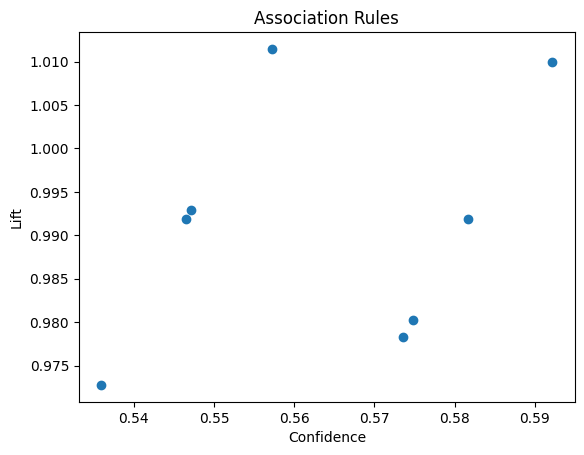

In [26]:
plt.scatter(association_rules_df['confidence'], association_rules_df['lift'])
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules')
plt.show()

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Create a DataFrame with your dataset
df = dataArr

# Select non-numerical columns for encoding
categorical_columns = ['Sex', 'Marital_status', 'State_names', 'Segment', 'Employees_status', 'Payment_method']

# Apply LabelEncoder to each non-numerical column
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Print the encoded DataFrame
print(df)

"""Classification : Decision Tree"""

# Separate input features (X) and target variable (y)
X = df.drop('Segment', axis=1)  # Drop the 'Segment' column from the DataFrame to create X
y = df['Segment']  # Assign the 'Segment' column as the target variable y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)


print("Accuracy:", clf.score(X_test , y_test))

"""Classification : SVM"""


# Separate input features (X) and target variable (y)
X = df.drop('Segment', axis=1)  # Drop the 'Segment' column from the DataFrame to create X
y = df['Segment']  # Assign the 'Segment' column as the target variable y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
clf = SVC()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

"""Clustering : K-means"""

# Select the columns for clustering
columns_for_clustering = ['Sex', 'Age', 'Marital_status', 'State_names', 'Employees_status', 'Payment_method', 'Referal', 'Amount_spent']
X = df[columns_for_clustering].values

# Perform K-means clustering
# n_cluster is number of distinct groups or clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster labels
print(labels)

"""Clustering : DBSCAN"""

# Select the columns for clustering
columns_for_clustering = ['Sex', 'Age', 'Marital_status', 'State_names', 'Employees_status', 'Payment_method', 'Referal', 'Amount_spent']
X = df[columns_for_clustering].values

# Perform DBSCAN clustering
# eps is the maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples is the minimum number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Print the cluster labels
print(labels)

     Transaction_date  Transaction_ID  Sex   Age  Marital_status  State_names  \
0          2019-01-01          151200    0  19.0               1           15   
1          2019-01-01          151201    1  49.0               1           12   
2          2019-01-01          151202    1  63.0               0           30   
3          2019-01-01          151203    0  18.0               1           45   
4          2019-01-01          151204    1  27.0               1            6   
...               ...             ...  ...   ...             ...          ...   
2507       2021-05-01          153695    0  57.0               1           39   
2508       2021-05-01          153696    0  36.0               0           10   
2509       2021-05-01          153697    1  22.0               1           39   
2510       2021-05-01          153698    0  44.0               1           31   
2511       2021-05-01          153699    1  48.0               1            4   

      Segment  Employees_st

TypeError: float() argument must be a string or a real number, not 'Timestamp'